In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [2]:
# open the dataset
# showing the first 5 columns of the dataset
dfold = pd.read_csv("water_potability.csv")
dfold.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
# returns the shape of the dataset 
dfold.shape

(3276, 10)

In [4]:
#beginning the pre processing cheking the null values in the dataset
dfold.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
# returing the description of the data
dfold.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
#the is going to change the null values to meadian values
df = dfold.fillna(dfold.groupby('Potability').transform('median'))

In [7]:
# returns the shape of the dataset 
df.shape

(3276, 10)

In [8]:
# Showing the sum of null values in the dataset  
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [9]:
# importing the standardScaler and seeting as scaler
# fitting the standardScaler to the dataset and print the description
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
array = scaler.fit_transform(df.to_numpy())
df2 = pd.DataFrame(array, columns = ['ph','Hardness','Solids','Chloramines', 'Sulphate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes','Turbidity', 'Potability'])
df2.describe()

,ph,Hardness,Solids,Chloramines,Sulphate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03
mean,1.019060e-16,1.072508e-15,-4.714042e-17,5.111482e-16,1.636024e-15,1.835460e-16,3.372014e-17,-3.894592e-16,5.387089e-16,6.415978e-16
std,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00
min,-4.812885e+00,-4.530454e+00,-2.474344e+00,-4.277288e+00,-5.659588e+00,-3.028290e+00,-3.653635e+00,-4.164747e+00,-3.225560e+00,-7.997747e-01
25%,-5.418332e-01,-5.937372e-01,-7.239916e-01,-6.285247e-01,-4.551658e-01,-7.482911e-01,-6.709187e-01,-6.188751e-01,-6.755095e-01,-7.997747e-01
50%,-2.627108e-02,1.819424e-02,-1.238999e-01,5.068209e-03,-4.302620e-03,-5.345935e-02,-2.014487e-02,8.651097e-03,-1.507005e-02,-7.997747e-01
75%,5.415501e-01,6.174333e-01,6.066532e-01,6.271058e-01,4.659717e-01,6.878605e-01,6.870970e-01,6.507560e-01,6.837866e-01,1.250352e+00
max,4.712098e+00,3.855680e+00,4.472689e+00,3.793631e+00,4.080807e+00,4.048144e+00,4.237147e+00,3.652708e+00,3.552921e+00,1.250352e+00


In [10]:
# Showing the number of zeros and ones in the column Potabity
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

39.01 % of samples that are good to drink
60.99 % of samples that aren´t good to drink


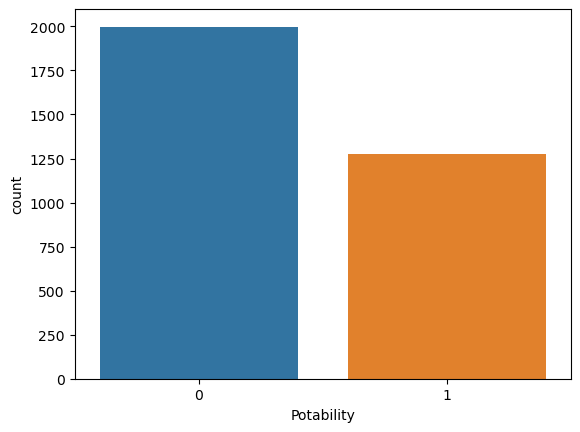

In [11]:
# graph to show the percentages of zeros and ones
sns.countplot(df["Potability"])
print(f'{df.Potability[df.Potability==1].count()/df.Potability.count()*100:.2f} % of samples that are good to drink')
print(f'{(df.Potability[df.Potability==0].count()/df.Potability.count())*100:.2f} % of samples that aren´t good to drink')

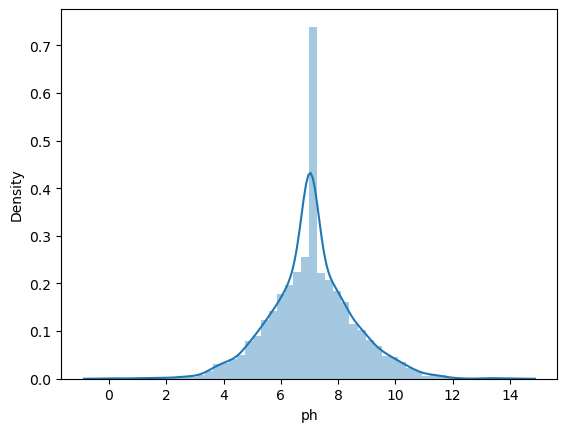

In [12]:
# graphic that shows the overall of ph 
sns.distplot(df['ph'])
plt.show()

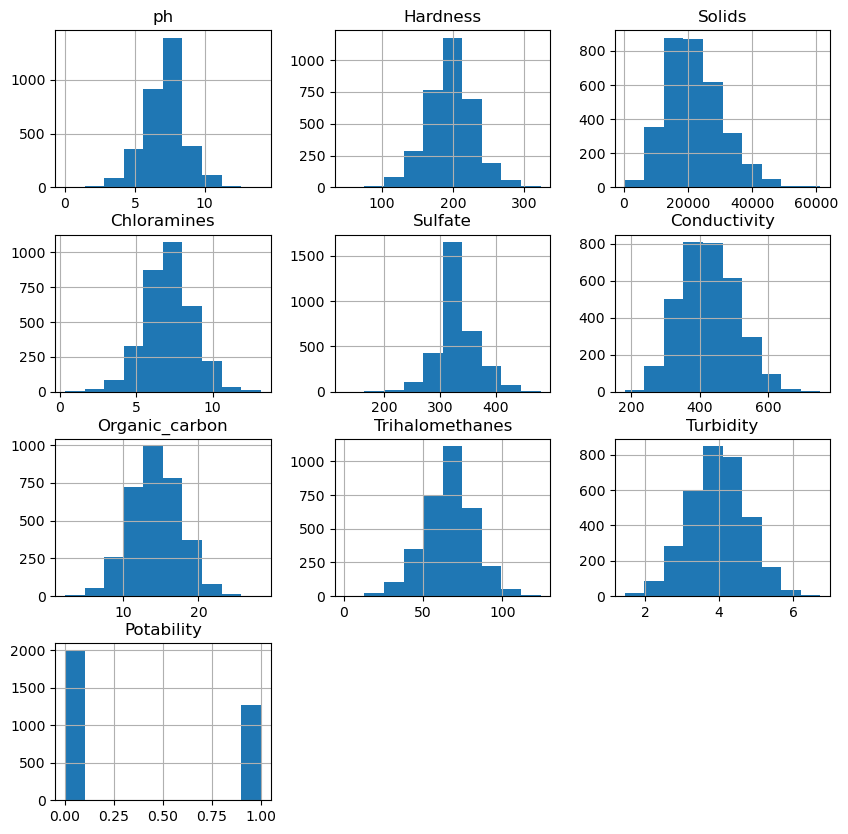

In [13]:
# showing the graphs for each column
df.hist(figsize=(10,10))
plt.show()

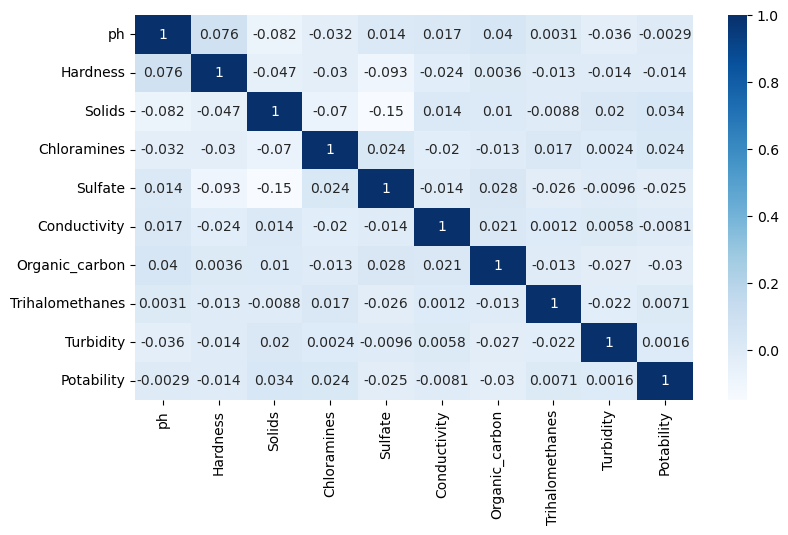

In [14]:
# graph to see the corrulation of the dataset
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

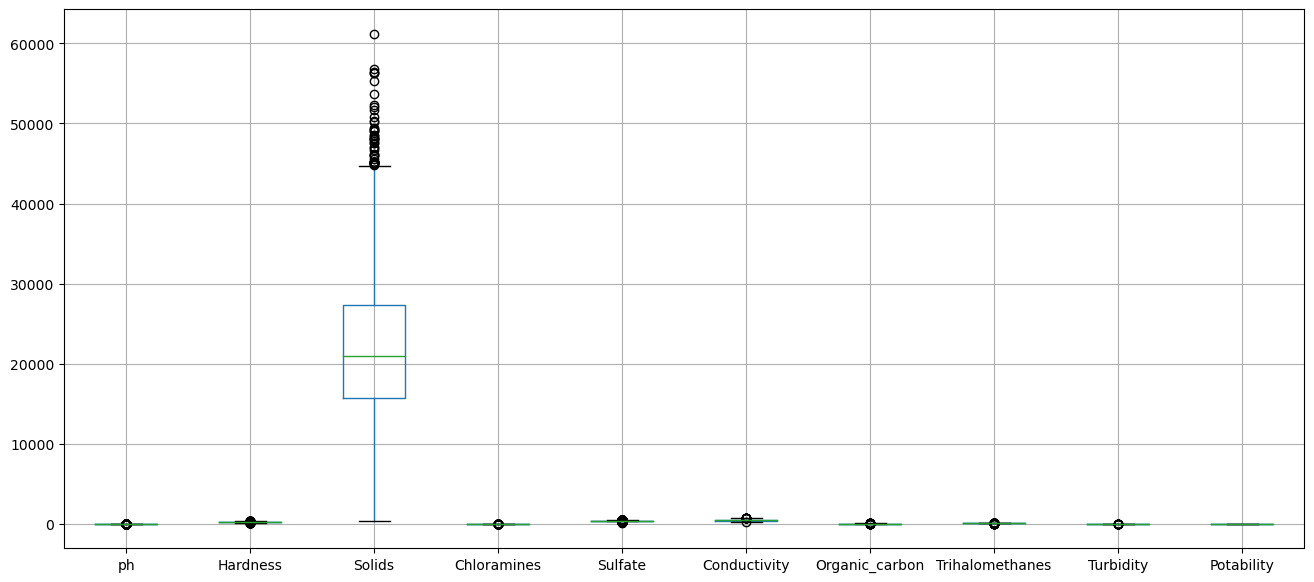

In [15]:
# graph used to see the outliears
df.boxplot(figsize=(16,7))
plt.show()

In [16]:
# defining x and y values
x = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes','Turbidity']].values
y = df['Potability'].values

In [17]:
# Is splitting the data into random train and test subsets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.25, random_state=0)

In [18]:
# modeling the classifiers with out using StandardScaler
# modeling GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
model_default_GBC = GradientBoostingClassifier()
# modeling DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model_default_DecisionTree = DecisionTreeClassifier(max_depth=int(5), random_state=11)
# modeling RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model_default_RFC = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)

# fitting the models
model_default_GBC.fit(x_train, y_train)
model_default_DecisionTree.fit(x_train, y_train)
model_default_RFC.fit(x_train, y_train)

# prediction the models
pred_GBC = model_default_GBC.predict(x_test)
pred_DecisionTree = model_default_DecisionTree.predict(x_test)
pred_RFC = model_default_RFC.predict(x_test)

# getting the scores for the models
train_score_GBC = model_default_GBC.score(x_train, y_train)
test_score_GBC = model_default_GBC.score(x_test, y_test)
print("GBC score:")
print("Training score: {:.3f}%".format(train_score_GBC * 100))
print("Test score: {:.3f}%".format(test_score_GBC * 100))

train_score_DecisionTree = model_default_DecisionTree.score(x_train, y_train)
test_score_DecisionTree = model_default_DecisionTree.score(x_test, y_test)
print("DecisionTree score:")
print("Training score: {:.3f}%".format(train_score_DecisionTree * 100))
print("Test score: {:.3f}%".format(test_score_DecisionTree * 100))

train_score_RFC = model_default_RFC.score(x_train, y_train)
test_score_RFC = model_default_RFC.score(x_test, y_test)
print("RFC score:")
print("Training score: {:.3f}%".format(train_score_RFC * 100))
print("Test score: {:.3f}%".format(test_score_RFC * 100))

GBC score:
Training score: 86.284%
Test score: 79.853%
DecisionTree score:
Training score: 76.842%
Test score: 74.481%
RFC score:
Training score: 74.685%
Test score: 74.237%


In [19]:
# implementing the StandardScaler into the dataset 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [20]:
# modeling the classification models
# modeling KneighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()
# modeling DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree = DecisionTreeClassifier(max_depth=int(5), random_state=11)
# modeling LogisticRegression
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
# modeling GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
model_GBC = GradientBoostingClassifier()
# modeling RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
# modeling BernoulliNB
from sklearn.naive_bayes import BernoulliNB
model_BNB = BernoulliNB(binarize=0.0)
# modeling GaussianNB
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
# modeling mlpclasifier 
from sklearn.neural_network import MLPClassifier
model_MLP = MLPClassifier(max_iter=600, random_state=0)

In [21]:
# fitting the models
model_KNN.fit(x_train_scaled, y_train)
model_DecisionTree.fit(x_train_scaled, y_train)
model_LR.fit(x_train_scaled, y_train)
model_GBC.fit(x_train_scaled, y_train)
model_RFC.fit(x_train_scaled, y_train)
model_BNB.fit(x_train_scaled, y_train)
model_GNB.fit(x_train_scaled, y_train)
model_MLP.fit(x_train_scaled, y_train)

# and prediction the models
pred_KNN = model_KNN.predict(x_test_scaled)
pred_DecisionTree = model_DecisionTree.predict(x_test_scaled)
pred_LR = model_LR.predict(x_test_scaled)
pred_GBC = model_GBC.predict(x_test_scaled)
pred_RFC = model_RFC.predict(x_test_scaled)
pred_BNB = model_BNB.predict(x_test_scaled)
pred_GNB = model_GNB.predict(x_test_scaled)
pred_MLP = model_MLP.predict(x_test_scaled)

In [22]:
# printing the classification report for the y test and the prediction of each model
print(classification_report(y_test,pred_KNN))
print(classification_report(y_test,pred_DecisionTree))
print(classification_report(y_test,pred_LR))
print(classification_report(y_test,pred_GBC))
print(classification_report(y_test,pred_RFC))
print(classification_report(y_test,pred_BNB))
print(classification_report(y_test,pred_GNB))
print(classification_report(y_test,pred_MLP))

              precision    recall  f1-score   support

           0       0.67      0.79      0.73       502
           1       0.54      0.39      0.45       317

    accuracy                           0.63       819
   macro avg       0.61      0.59      0.59       819
weighted avg       0.62      0.63      0.62       819

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       502
           1       0.76      0.50      0.60       317

    accuracy                           0.74       819
   macro avg       0.75      0.70      0.71       819
weighted avg       0.75      0.74      0.73       819

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       502
           1       1.00      0.01      0.02       317

    accuracy                           0.62       819
   macro avg       0.81      0.50      0.39       819
weighted avg       0.76      0.62      0.47       819

              preci

In [23]:
# getting the scores for the models
train_score_KNN = model_KNN.score(x_train_scaled, y_train)
test_score_KNN = model_KNN.score(x_test_scaled, y_test)
print("KNN score:")
print("Training score: {:.3f}%".format(train_score_KNN * 100))
print("Test score: {:.3f}%".format(test_score_KNN * 100))

train_score_DecisionTree = model_DecisionTree.score(x_train_scaled, y_train)
test_score_DecisionTree = model_DecisionTree.score(x_test_scaled, y_test)
print("DecisionTree score:")
print("Training score: {:.3f}%".format(train_score_DecisionTree * 100))
print("Test score: {:.3f}%".format(test_score_DecisionTree * 100))

train_score_LR = model_LR.score(x_train_scaled, y_train)
test_score_LR = model_LR.score(x_test_scaled, y_test)
print("LR score:")
print("Training score: {:.3f}%".format(train_score_LR * 100))
print("Test score: {:.3f}%".format(test_score_LR * 100))

train_score_GBC = model_GBC.score(x_train_scaled, y_train)
test_score_GBC = model_GBC.score(x_test_scaled, y_test)
print("GBC score:")
print("Training score: {:.3f}%".format(train_score_GBC * 100))
print("Test score: {:.3f}%".format(test_score_GBC * 100))

train_score_RFC = model_RFC.score(x_train_scaled, y_train)
test_score_RFC = model_RFC.score(x_test_scaled, y_test)
print("RFC score:")
print("Training score: {:.3f}%".format(train_score_RFC * 100))
print("Test score: {:.3f}%".format(test_score_RFC * 100))

train_score_BNB = model_BNB.score(x_train_scaled, y_train)
test_score_BNB = model_BNB.score(x_test_scaled, y_test)
print("BNB score:")
print("Training score: {:.3f}%".format(train_score_BNB * 100))
print("Test score: {:.3f}%".format(test_score_BNB * 100))

train_score_GNB = model_GNB.score(x_train_scaled, y_train)
test_score_GNB = model_GNB.score(x_test_scaled, y_test)
print("GNB score:")
print("Training score: {:.3f}%".format(train_score_GNB * 100))
print("Test score: {:.3f}%".format(test_score_GNB * 100))

train_score_MLP = model_MLP.score(x_train_scaled, y_train)
test_score_MLP = model_MLP.score(x_test_scaled, y_test)
print("MLP Score:")
print("Training score: {:.3f}%".format(train_score_MLP * 100))
print("Test score: {:.3f}%".format(test_score_MLP * 100))

KNN score:
Training score: 75.865%
Test score: 63.492%
DecisionTree score:
Training score: 76.842%
Test score: 74.481%
LR score:
Training score: 61.213%
Test score: 61.661%
GBC score:
Training score: 86.284%
Test score: 79.853%
RFC score:
Training score: 74.685%
Test score: 74.237%
BNB score:
Training score: 60.887%
Test score: 61.294%
GNB score:
Training score: 63.329%
Test score: 60.806%
MLP Score:
Training score: 82.621%
Test score: 62.882%


In [24]:
# is created a table to get a better view of the models scores.
models_data= {'Machine_Learning_Algorithms':["KNeighborsClassifier","DecisionTreeClassifier",
                                             "LogisticRegression","GradientBoostingClassifier",
                                             "RandomForestClassifier", "BernoulliNB","GaussianNB",
                                             "MLPClassifier"],
             'Training_Scores':[train_score_KNN*100,train_score_DecisionTree*100, 
                                train_score_LR*100,train_score_GBC*100,train_score_RFC*100,
                                train_score_BNB*100,train_score_GNB*100,train_score_MLP*100],
             'Test_Scores':[test_score_KNN*100,test_score_DecisionTree*100,
                            test_score_LR*100,test_score_GBC*100,test_score_RFC*100,
                            test_score_BNB*100,test_score_GNB*100,test_score_MLP*100]}

models_dataset = pd.DataFrame(models_data)
models_dataset.set_index('Machine_Learning_Algorithms', inplace=True)
models_dataset.sort_values(by =['Test_Scores'], ascending=False)

,Training_Scores,Test_Scores
Machine_Learning_Algorithms,,
GradientBoostingClassifier,86.284086,79.853480
DecisionTreeClassifier,76.841677,74.481074
RandomForestClassifier,74.684575,74.236874
KNeighborsClassifier,75.864876,63.492063
MLPClassifier,82.621083,62.881563
LogisticRegression,61.212861,61.660562
BernoulliNB,60.887261,61.294261
GaussianNB,63.329263,60.805861


<AxesSubplot:>

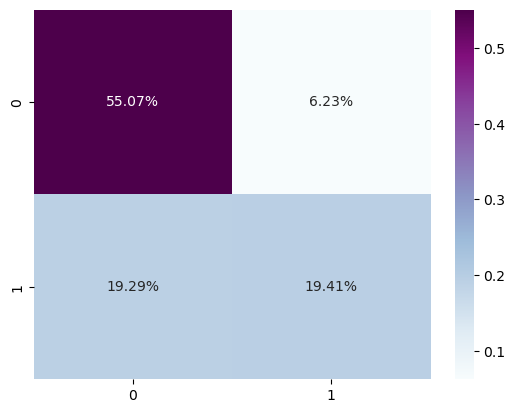

In [25]:
# confusion Matrix for DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,pred_DecisionTree)
cm = confusion_matrix(y_test, pred_DecisionTree)
sns.heatmap(cm/np.sum(cm), annot = True, fmt=  '0.2%', cmap = 'BuPu')

<AxesSubplot:>

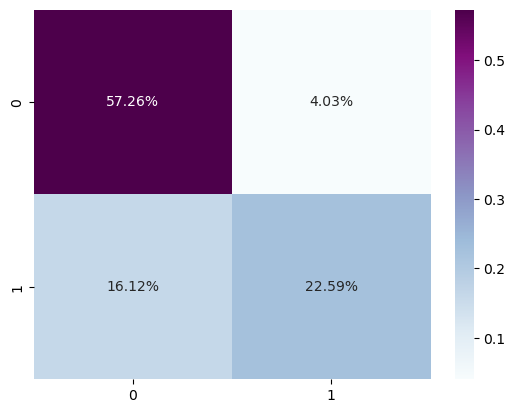

In [26]:
# confusion Matrix for GradientBostingClassifier
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,pred_GBC)
cm = confusion_matrix(y_test, pred_GBC)
sns.heatmap(cm/np.sum(cm), annot = True, fmt=  '0.2%', cmap = 'BuPu')

<AxesSubplot:>

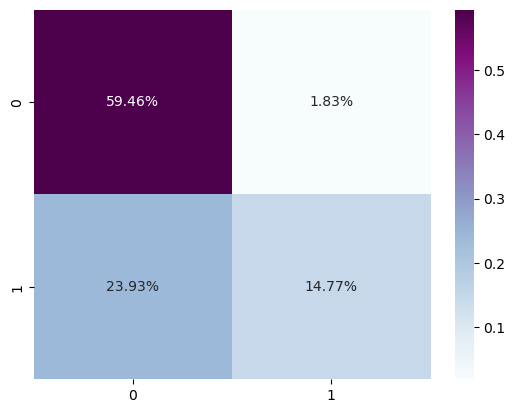

In [27]:
# confusion Matrix for RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,pred_RFC)
cm = confusion_matrix(y_test, pred_RFC)
sns.heatmap(cm/np.sum(cm), annot = True, fmt=  '0.2%', cmap = 'BuPu')

In [28]:
# Now is going to tune 3 algorithms and see the results to compare it
# Tunning GradientBoostingClassifier using GridSearchCV
from sklearn.model_selection import GridSearchCV

model_GBC = GradientBoostingClassifier()

parameters = {'learning_rate': [0.03,0.04,0.05,0.06,0.07],
                  'subsample'    : [0.5, 0.6, 0.7],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [3,4,5]
                 }

grid_GBC = GridSearchCV(estimator=model_GBC, param_grid = parameters, cv = 5, n_jobs=-1)
grid_GBC.fit(x_train_scaled, y_train)


print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBC.best_estimator_)
print("\n The best score across ALL searched params:\n",format(grid_GBC.best_score_*100))
print("\n The best parameters across ALL searched params:\n",grid_GBC.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(learning_rate=0.03, max_depth=5, subsample=0.6)

 The best score across ALL searched params:
 79.32417664298843

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.6}


In [41]:
# shows the test_score after tunnning
model_GBC_AFT = GradientBoostingClassifier(learning_rate = 0.05, max_depth = 4, n_estimators = 100, subsample = 0.7)
model_GBC_AFT.fit(x_train_scaled, y_train)
predict_GBC= model_GBC_AFT.predict(x_test_scaled)
test_score_GNB_AFT = model_GBC_AFT.score(x_test_scaled, y_test)
grid_GBC_new = test_score_GNB_AFT*100
print("The test score after tunning for GradientBoostingClassifier is:",test_score_GNB_AFT*100)

The test score after tunning for GradientBoostingClassifier is: 80.46398046398046


In [43]:
print(classification_report(y_test,predict_GBC))

              precision    recall  f1-score   support

           0       0.78      0.94      0.86       502
           1       0.87      0.59      0.70       317

    accuracy                           0.80       819
   macro avg       0.82      0.76      0.78       819
weighted avg       0.81      0.80      0.79       819



In [31]:
# Tunning DecisionTreeClassifier using GridSearchCV
from sklearn.model_selection import GridSearchCV

DTC = DecisionTreeClassifier()

parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
                  'splitter'  : ['best', 'random'],
                  'max_depth' : [2,4,6,8],
                  'min_samples_split' : [2,4,8,9]
                 }


grid_DTC = GridSearchCV(estimator=DTC, param_grid = parameters, cv = 2, n_jobs=-1)
grid_DTC.fit(x_train_scaled, y_train)


print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_DTC.best_estimator_)
print("\n The best score across ALL searched params:\n",format(grid_DTC.best_score_*100))
print("\n The best parameters across ALL searched params:\n",grid_DTC.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=8)

 The best score across ALL searched params:
 74.84713877175639

 The best parameters across ALL searched params:
 {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 8, 'splitter': 'best'}


In [38]:
# shows the test_score after tunnning
model_DTC_AFT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_split = 9, splitter = 'best')
model_DTC_AFT.fit(x_train_scaled, y_train)
predict_DTC = model_DTC_AFT.predict(x_test_scaled)
test_score_DTC_AFT = model_DTC_AFT.score(x_test_scaled, y_test)
grid_DTC_new = test_score_DTC_AFT*100
print("The test score after tunning for DecisionTreeClassifier is:",test_score_DTC_AFT*100)

The test score after tunning for DecisionTreeClassifier is: 76.55677655677655


In [44]:
print(classification_report(y_test,predict_DTC))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       502
           1       0.77      0.56      0.65       317

    accuracy                           0.77       819
   macro avg       0.77      0.73      0.74       819
weighted avg       0.77      0.77      0.76       819



In [34]:
# Tunning RadomForestClassifier using GridSearchCV
from sklearn.model_selection import GridSearchCV

model_RFC = RandomForestClassifier()

parameters = {'max_depth': [2,4,6],
                  'min_samples_split'    : [2,3,4],
                  'n_estimators' : [100,500,1000],
                 }
grid_RFC = GridSearchCV(estimator=model_RFC , param_grid = parameters, cv = 2, n_jobs=-1)
grid_RFC.fit(x_train_scaled, y_train)


print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_RFC.best_estimator_)
print('\n The best score across ALL searched params: \n',format(grid_RFC.best_score_*100))
print("\n The best parameters across ALL searched params: \n",grid_RFC.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=6, n_estimators=500)

 The best score across ALL searched params: 
 76.67938632875965

 The best parameters across ALL searched params: 
 {'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 500}


In [45]:
# shows the test_score after tunnning
model_RFC_AFT = RandomForestClassifier(max_depth = 6, min_samples_split = 2, n_estimators = 500)
model_RFC_AFT.fit(x_train_scaled, y_train)
predict_RFC = model_RFC_AFT.predict(x_test_scaled)
test_score_RFC_AFT = model_RFC_AFT.score(x_test_scaled, y_test)
grid_RFC_new = test_score_RFC_AFT*100
print("The test score after tunning for RandomForestClassifier is:",test_score_RFC_AFT*100)

The test score after tunning for RandomForestClassifier is: 79.48717948717949


In [46]:
print(classification_report(y_test,predict_RFC))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       502
           1       0.89      0.53      0.67       317

    accuracy                           0.79       819
   macro avg       0.83      0.75      0.76       819
weighted avg       0.82      0.79      0.78       819



In [47]:
# creating a table to see the results before the tunning and after, so is more easy to compare it 
models_data= {'Machine_Learning_Algorithms':["GradientBoostingClassifier","DecisionTreeClassifier",
                                             "RandomForestClassifier"],
             'Test_Scores_before_tunning':[test_score_GBC*100,test_score_DecisionTree*100, 
                                test_score_RFC*100],
             'Test_Scores_after_tunning':[grid_GBC_new,grid_DTC_new,
                                grid_RFC_new]}

results_df = pd.DataFrame(models_data)
results_df.set_index('Machine_Learning_Algorithms', inplace=True)
results_df

,Test_Scores_before_tunning,Test_Scores_after_tunning
Machine_Learning_Algorithms,,
GradientBoostingClassifier,79.853480,80.463980
DecisionTreeClassifier,74.481074,76.556777
RandomForestClassifier,74.236874,79.487179
